In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [5]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [6]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [38]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [39]:
df['target'] = encoder.fit_transform(df['target'])

/tmp/ipython-input-1103932564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = encoder.fit_transform(df['target'])


In [40]:
df.isnull().sum()

,0
target,0
text,0
num_charecters,0
num_words,0
num_sents,0
transformed_text,0


In [41]:
df.duplicated().sum()

np.int64(0)

In [42]:
df = df.drop_duplicates(keep = 'first')

In [43]:
df.duplicated().sum()

np.int64(0)

In [44]:
df.head()

,target,text,num_charecters,num_words,num_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#EDA

In [45]:
df['target'].value_counts()

,count
target,
0,4516
1,653


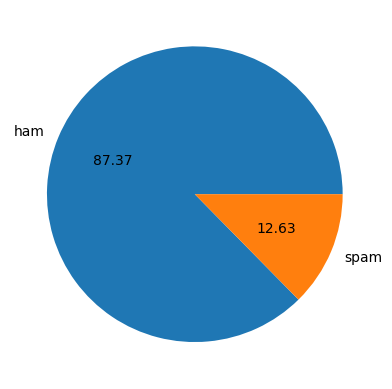

In [46]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [47]:
!pip install nltk

In [48]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
df['num_charecters'] = df['text'].apply(len)

In [50]:
df.head()

,target,text,num_charecters,num_words,num_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
#number of words
nltk.download('punkt_tab')
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [52]:
#number of sentences
df['num_sents'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [53]:
df[['num_charecters','num_words','num_sents']].describe()

,num_charecters,num_words,num_sents
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [54]:
df[df['target']==1][['num_charecters','num_words','num_sents']].describe()

,num_charecters,num_words,num_sents
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [55]:
df[df['target']==0][['num_charecters','num_words','num_sents']].describe()

,num_charecters,num_words,num_sents
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [56]:
import seaborn as sns

<Axes: xlabel='num_charecters', ylabel='Count'>

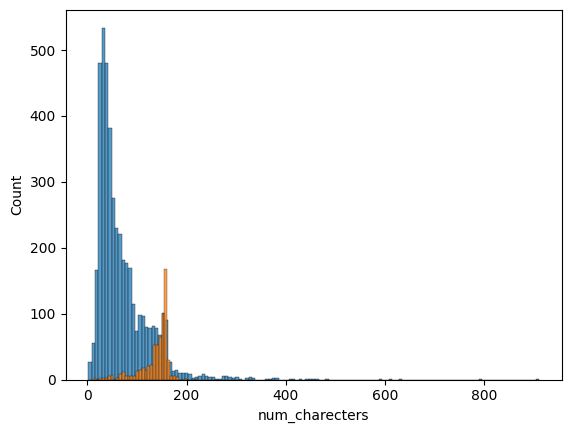

In [57]:
sns.histplot(df[df['target'] ==0]['num_charecters'])#spam
sns.histplot(df[df['target'] ==1]['num_charecters']) #ham

<Axes: >

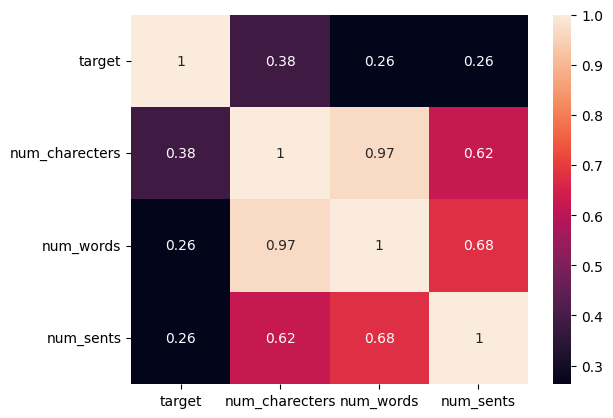

In [58]:
sns.heatmap(df[['target', 'num_charecters', 'num_words', 'num_sents']].corr(), annot=True)

In [59]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum(): # Corrected from isalum()
      y.append(i)

  text = y[:] # Create a copy to modify
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))


  return " ".join(y) # convert list to string

In [60]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [61]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#stemming

In [62]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('laughing')

'laugh'

In [63]:

df['text'].apply(transform_text)

,text
0,go jurong point crazi avail bugi n great world...
1,ok lar joke wif u oni
2,free entri 2 wkli comp win fa cup final tkt 21...
3,u dun say earli hor u c alreadi say
4,nah think goe usf live around though
...,...
5567,2nd time tri 2 contact u pound prize 2 claim e...
5568,b go esplanad fr home
5569,piti mood suggest
5570,guy bitch act like interest buy someth els nex...


In [64]:
df['transformed_text'] = df['text'].apply(transform_text)


In [65]:
df.head()

,target,text,num_charecters,num_words,num_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [66]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [67]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

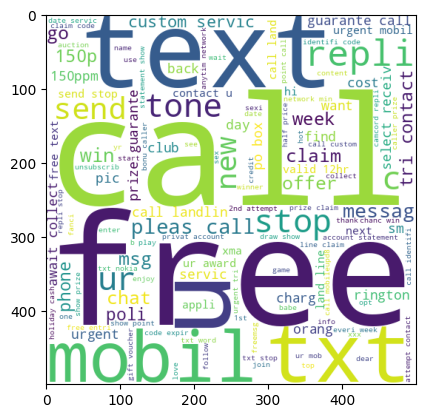

In [68]:
plt.imshow(spam_wc)

In [69]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

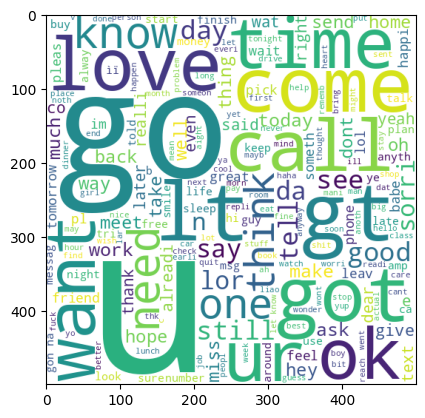

In [70]:
plt.imshow(ham_wc)

In [71]:
df.head()

,target,text,num_charecters,num_words,num_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [72]:
spam_words = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for words in msg.split():
    spam_words.append(words)
print(len(spam_words))

9939


<Axes: ylabel='0'>

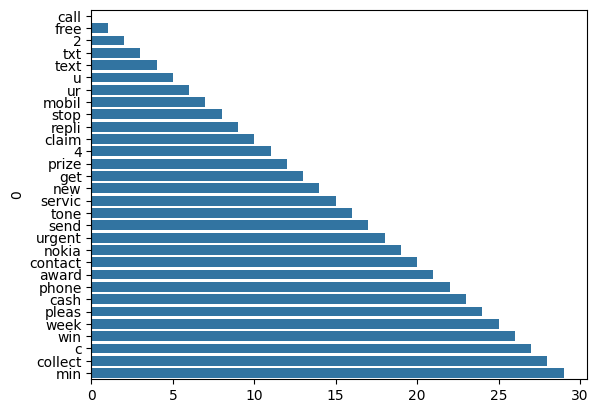

In [73]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_words).most_common(30))[0])


In [74]:
ham_words = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for words in msg.split():
    ham_words.append(words)
print(len(ham_words))

35404


<Axes: ylabel='0'>

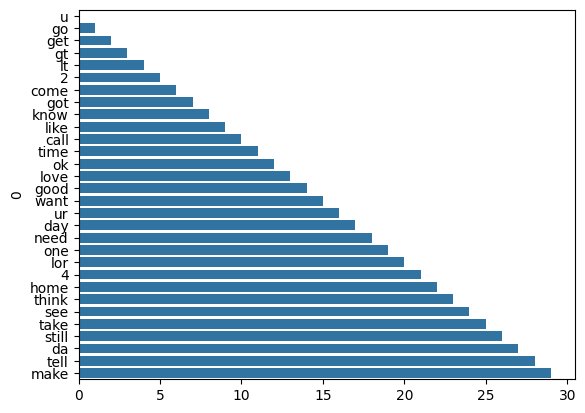

In [75]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_words).most_common(30))[0])

#**Model Building**

In [76]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [77]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [78]:
X.shape

(5169, 6708)

In [79]:
y = df['target'].values

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [81]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [82]:
from sklearn.naive_bayes import MultinomialNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
# gnb.fit(X_train,y_train)
# y_pred1 = gnb.predict(X_test)
# print(accuracy_score(y_test,y_pred1))
# print(confusion_matrix(y_test,y_pred1))
# print(precision_score(y_test,y_pred1))

In [83]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [ ]:
# bnb.fit(X_train,y_train)
# y_pred3 = bnb.predict(X_test)
# print(accuracy_score(y_test,y_pred3))
# print(confusion_matrix(y_test,y_pred3))
# print(precision_score(y_test,y_pred3))

In [84]:
X_new = tfidf.fit_transform(df['transformed_text']).toarray()

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.2,random_state=2)

In [ ]:
# mnb.fit(X_train,y_train)
# y_pred2 = mnb.predict(X_test)
# print(accuracy_score(y_test,y_pred2))
# print(confusion_matrix(y_test,y_pred2))
# print(precision_score(y_test,y_pred2))

In [ ]:
cv.fit_transform(df['transformed_text'])


In [88]:
msg = input("Enter message: ")

# preprocessing
transformed_msg = transform_text(msg)

# vectorize
vector_input = cv.transform([transformed_msg]).toarray()

# predict
result = mnb.predict(vector_input)[0]

if result == 1:
    print("Spam")
else:
    print("Not Spam")


Enter message: Turn your ideas into designs, in seconds. Get Adobe Express Premium worth Rs. 4000, FREE for all Airtel users for 12 months - a quick and easy design app to create social posts, invites, videos & more. Claim now: https://i.airtel.in/adobe_express4
Spam
